In [2]:
import csv
import os
import pandas as pd
from collections import Counter
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
pd.set_option('display.float_format', lambda x: '%.3f' % x)


from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.utils import resample

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB, ComplementNB, MultinomialNB, BernoulliNB


# Predictiong Graph in 2012

* Load training and testing dataframes

In [11]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2012/train/dataframe.csv", newline='') as csvfile:
    training_df = pd.read_csv(csvfile)
    
training_df['avg_deg'] = (training_df['deg_e1']+training_df['deg_e2'])/2
training_df = training_df.drop(['deg_e1', 'deg_e2'], axis=1)
training_df = training_df[['e1','e2','CN','AA','HP','HD','JC','LHN','RA','SA','SO','avg_deg','label']]

X_train = training_df.iloc[:,2:-1]
Y_train = training_df.iloc[:]['label']

X_train.head()

with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2012/test/dataframe.csv", newline='') as csvfile:
    testing_df = pd.read_csv(csvfile)

testing_df['avg_deg'] = (testing_df['deg_e1']+testing_df['deg_e2'])/2
testing_df = testing_df.drop(['deg_e1', 'deg_e2'], axis=1)
testing_df = testing_df[['e1','e2','CN','AA','HP','HD','JC','LHN','RA','SA','SO','avg_deg','label']]


X_test = testing_df.iloc[:,2:-1]
Y_test = testing_df.iloc[:]['label']

X_test.head()

,CN,AA,HP,HD,JC,LHN,RA,SA,SO,avg_deg
0,892.000,110.430,0.999,0.927,0.926,0.001,3.899,3.899,0.962,927.500
1,892.000,110.430,0.999,0.927,0.926,0.001,3.899,3.899,0.962,927.500
2,888.000,109.771,0.994,0.970,0.965,0.001,3.840,3.840,0.982,904.000
3,892.000,110.430,0.999,0.927,0.926,0.001,3.899,3.899,0.962,927.500
4,892.000,110.430,0.999,0.927,0.926,0.001,3.899,3.899,0.962,927.500


* define evaluation function

In [12]:
def evaluate_model(predictions, actual):
    return pd.DataFrame({
        "Measure": ["Accuracy", "Precision", "Recall", "f1_score"],
        "Source": [accuracy_score(actual, predictions), 
                   precision_score(actual, predictions), 
                   recall_score(actual, predictions),
                   f1_score(actual, predictions)]
    })

* Find important features

In [13]:
def feature_importance(columns, classifier):
    display("Feature Importance")
    df = pd.DataFrame({"Features": columns,
                      "Importance": classifier.feature_importances_})
    df = df.sort_values("Importance", ascending=False)
    ax = df.plot(kind='bar', x='Features', y='Importance', legend=None)
    #ax.xaxist.set_label_text("")
    plt.tight_layout()
    plt.show

* choose a ML algorithm

In [14]:
classifier = RandomForestClassifier(n_estimators=100, max_depth=40, random_state=0, criterion="entropy", 
                                    max_samples=20)

* Training

In [15]:
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=40, max_samples=20,
                       random_state=0)

* Make a predict

In [16]:
prediction = classifier.predict(X_test)

In [17]:
display(evaluate_model(prediction, Y_test))

,Measure,Source
0,Accuracy,0.822
1,Precision,0.754
2,Recall,0.689
3,f1_score,0.720


'Feature Importance'

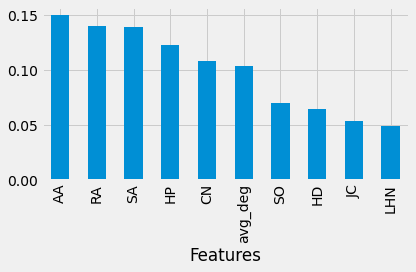

In [19]:
columns = ['CN', 'AA', 'HP', 'HD', 'JC', 'LHN', 'RA', 'SA', 'SO', 'avg_deg']
feature_importance(columns, classifier)

# Predictiong Graph in 2013

* Load training and testing dataframes

In [20]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2013/train/dataframe.csv", newline='') as csvfile:
    training_df = pd.read_csv(csvfile)
    
training_df['avg_deg'] = (training_df['deg_e1']+training_df['deg_e2'])/2
training_df = training_df.drop(['deg_e1', 'deg_e2'], axis=1)
training_df = training_df[['e1','e2','CN','AA','HP','HD','JC','LHN','RA','SA','SO','avg_deg','label']]

X_train = training_df.iloc[:,2:-1]
Y_train = training_df.iloc[:]['label']

X_train.head()

with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2013/test/dataframe.csv", newline='') as csvfile:
    testing_df = pd.read_csv(csvfile)

testing_df['avg_deg'] = (testing_df['deg_e1']+testing_df['deg_e2'])/2
testing_df = testing_df.drop(['deg_e1', 'deg_e2'], axis=1)
testing_df = testing_df[['e1','e2','CN','AA','HP','HD','JC','LHN','RA','SA','SO','avg_deg','label']]


X_test = testing_df.iloc[:,2:-1]
Y_test = testing_df.iloc[:]['label']

X_test.head()

,CN,AA,HP,HD,JC,LHN,RA,SA,SO,avg_deg
0,1153.000,139.123,0.999,0.933,0.932,0.001,4.415,4.415,0.965,1195.000
1,1153.000,139.123,0.999,0.933,0.932,0.001,4.415,4.415,0.965,1195.000
2,1141.000,137.248,0.989,0.959,0.948,0.001,4.271,4.271,0.974,1172.000
3,1153.000,139.123,0.999,0.933,0.932,0.001,4.415,4.415,0.965,1195.000
4,1153.000,139.123,0.999,0.933,0.932,0.001,4.415,4.415,0.965,1195.000


In [21]:
X_test.head()

,CN,AA,HP,HD,JC,LHN,RA,SA,SO,avg_deg
0,1153.000,139.123,0.999,0.933,0.932,0.001,4.415,4.415,0.965,1195.000
1,1153.000,139.123,0.999,0.933,0.932,0.001,4.415,4.415,0.965,1195.000
2,1141.000,137.248,0.989,0.959,0.948,0.001,4.271,4.271,0.974,1172.000
3,1153.000,139.123,0.999,0.933,0.932,0.001,4.415,4.415,0.965,1195.000
4,1153.000,139.123,0.999,0.933,0.932,0.001,4.415,4.415,0.965,1195.000


* define evaluation function

In [22]:
def evaluate_model(predictions, actual):
    return pd.DataFrame({
        "Measure": ["Accuracy", "Precision", "Recall", "F1"],
        "Source": [accuracy_score(actual, predictions),
                   precision_score(actual, predictions),
                   recall_score(actual, predictions),
                   f1_score(actual,predictions)]
    })

* Find important features

In [23]:
def feature_importance(columns, classifier):
    display("Feature Importance")
    df = pd.DataFrame({"Features": columns,
                      "Importance": classifier.feature_importances_})
    df = df.sort_values("Importance", ascending=False)
    ax = df.plot(kind='bar', x='Features', y='Importance', legend=None)
    #ax.xaxist.set_label_text("")
    plt.tight_layout()
    plt.show

* choose a ML algorithm

In [24]:
classifier = RandomForestClassifier(n_estimators=30, max_depth=10, random_state=0)

* Training

In [25]:
classifier.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, n_estimators=30, random_state=0)

* Make a predict

In [26]:
prediction = classifier.predict(X_test)

In [27]:
display(evaluate_model(prediction, Y_test))

,Measure,Source
0,Accuracy,0.875
1,Precision,0.828
2,Recall,0.760
3,F1,0.792


'Feature Importance'

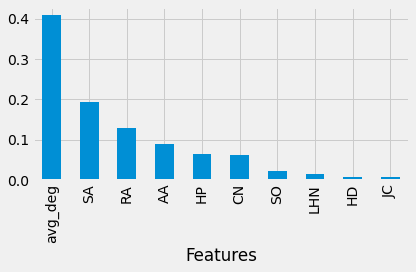

In [29]:
columns = ['CN', 'AA', 'HP', 'HD', 'JC', 'LHN', 'RA', 'SA', 'SO', 'avg_deg']
feature_importance(columns, classifier)

# Predictiong Graph in 2014

* Load training and testing dataframes

In [30]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2014/train/dataframe.csv", newline='') as csvfile:
    training_df = pd.read_csv(csvfile)
    
training_df['avg_deg'] = (training_df['deg_e1']+training_df['deg_e2'])/2
training_df = training_df.drop(['deg_e1', 'deg_e2'], axis=1)
training_df = training_df[['e1','e2','CN','AA','HP','HD','JC','LHN','RA','SA','SO','avg_deg','label']]

X_train = training_df.iloc[:,2:-1]
Y_train = training_df.iloc[:]['label']

X_train.head()

with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2014/test/dataframe.csv", newline='') as csvfile:
    testing_df = pd.read_csv(csvfile)

testing_df['avg_deg'] = (testing_df['deg_e1']+testing_df['deg_e2'])/2
testing_df = testing_df.drop(['deg_e1', 'deg_e2'], axis=1)
testing_df = testing_df[['e1','e2','CN','AA','HP','HD','JC','LHN','RA','SA','SO','avg_deg','label']]


X_test = testing_df.iloc[:,2:-1]
Y_test = testing_df.iloc[:]['label']

X_test.head()

,CN,AA,HP,HD,JC,LHN,RA,SA,SO,avg_deg
0,1379.000,163.384,0.999,0.945,0.945,0.001,4.845,4.845,0.971,1419.500
1,1379.000,163.384,0.999,0.945,0.945,0.001,4.845,4.845,0.971,1419.500
2,1363.000,160.895,0.988,0.963,0.952,0.001,4.650,4.650,0.975,1397.500
3,1379.000,163.384,0.999,0.945,0.945,0.001,4.845,4.845,0.971,1419.500
4,1379.000,163.384,0.999,0.945,0.945,0.001,4.845,4.845,0.971,1419.500


In [31]:
X_test.head()

,CN,AA,HP,HD,JC,LHN,RA,SA,SO,avg_deg
0,1379.000,163.384,0.999,0.945,0.945,0.001,4.845,4.845,0.971,1419.500
1,1379.000,163.384,0.999,0.945,0.945,0.001,4.845,4.845,0.971,1419.500
2,1363.000,160.895,0.988,0.963,0.952,0.001,4.650,4.650,0.975,1397.500
3,1379.000,163.384,0.999,0.945,0.945,0.001,4.845,4.845,0.971,1419.500
4,1379.000,163.384,0.999,0.945,0.945,0.001,4.845,4.845,0.971,1419.500


* define evaluation function

In [32]:
def evaluate_model(predictions, actual):
    return pd.DataFrame({
        "Measure": ["Accuracy", "Precision", "Recall", "F1"],
        "Source": [accuracy_score(actual, predictions), 
                   precision_score(actual, predictions), 
                   recall_score(actual, predictions),
                   f1_score(actual, predictions)]
    })

* Find important features

In [33]:
def feature_importance(columns, classifier):
    display("Feature Importance")
    df = pd.DataFrame({"Features": columns,
                      "Importance": classifier.feature_importances_})
    df = df.sort_values("Importance", ascending=False)
    ax = df.plot(kind='bar', x='Features', y='Importance', legend=None)
    #ax.xaxist.set_label_text("")
    plt.tight_layout()
    plt.show

* choose a ML algorithm

In [34]:
classifier = RandomForestClassifier(n_estimators=30, max_depth=10, random_state=0)

* Training

In [35]:
classifier.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, n_estimators=30, random_state=0)

* Make a predict

In [36]:
prediction = classifier.predict(X_test)

In [37]:
display(evaluate_model(prediction, Y_test))

,Measure,Source
0,Accuracy,0.853
1,Precision,0.892
2,Recall,0.651
3,F1,0.752


'Feature Importance'

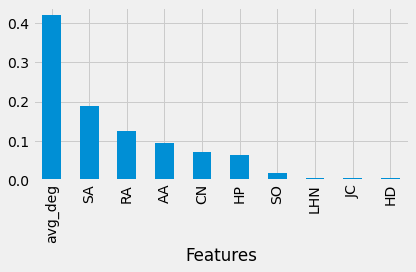

In [38]:
columns = ['CN', 'AA', 'HP', 'HD', 'JC', 'LHN', 'RA', 'SA', 'SO', 'avg_deg']
feature_importance(columns, classifier)

# Predictiong Graph in 2015

* Load training and testing dataframes

In [39]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2015/train/dataframe.csv", newline='') as csvfile:
    training_df = pd.read_csv(csvfile)
    
training_df['avg_deg'] = (training_df['deg_e1']+training_df['deg_e2'])/2
training_df = training_df.drop(['deg_e1', 'deg_e2'], axis=1)
training_df = training_df[['e1','e2','CN','AA','HP','HD','JC','LHN','RA','SA','SO','avg_deg','label']]

X_train = training_df.iloc[:,2:-1]
Y_train = training_df.iloc[:]['label']

X_train.head()

with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2015/test/dataframe.csv", newline='') as csvfile:
    testing_df = pd.read_csv(csvfile)

testing_df['avg_deg'] = (testing_df['deg_e1']+testing_df['deg_e2'])/2
testing_df = testing_df.drop(['deg_e1', 'deg_e2'], axis=1)
testing_df = testing_df[['e1','e2','CN','AA','HP','HD','JC','LHN','RA','SA','SO','avg_deg','label']]


X_test = testing_df.iloc[:,2:-1]
Y_test = testing_df.iloc[:]['label']

X_test.head()

,CN,AA,HP,HD,JC,LHN,RA,SA,SO,avg_deg
0,1790.000,203.975,0.999,0.939,0.938,0.001,5.032,5.032,0.968,1849.000
1,1790.000,203.975,0.999,0.939,0.938,0.001,5.032,5.032,0.968,1849.000
2,1779.000,202.244,0.993,0.969,0.963,0.001,4.889,4.889,0.981,1813.000
3,1790.000,203.975,0.999,0.948,0.947,0.001,5.032,5.032,0.973,1840.000
4,1790.000,203.975,0.999,0.939,0.938,0.001,5.032,5.032,0.968,1849.000


In [40]:
X_test.head()

,CN,AA,HP,HD,JC,LHN,RA,SA,SO,avg_deg
0,1790.000,203.975,0.999,0.939,0.938,0.001,5.032,5.032,0.968,1849.000
1,1790.000,203.975,0.999,0.939,0.938,0.001,5.032,5.032,0.968,1849.000
2,1779.000,202.244,0.993,0.969,0.963,0.001,4.889,4.889,0.981,1813.000
3,1790.000,203.975,0.999,0.948,0.947,0.001,5.032,5.032,0.973,1840.000
4,1790.000,203.975,0.999,0.939,0.938,0.001,5.032,5.032,0.968,1849.000


* define evaluation function

In [41]:
def evaluate_model(predictions, actual):
    return pd.DataFrame({
        "Measure": ["Accuracy", "Precision", "Recall", "F1"],
        "Source": [accuracy_score(actual, predictions), 
                   precision_score(actual, predictions), 
                   recall_score(actual, predictions),
                   f1_score(actual, predictions)]
    })

* Find important features

In [42]:
def feature_importance(columns, classifier):
    display("Feature Importance")
    df = pd.DataFrame({"Features": columns,
                      "Importance": classifier.feature_importances_})
    df = df.sort_values("Importance", ascending=False)
    ax = df.plot(kind='bar', x='Features', y='Importance', legend=None)
    #ax.xaxist.set_label_text("")
    plt.tight_layout()
    plt.show

* choose a ML algorithm

In [43]:
classifier = RandomForestClassifier(n_estimators=30, max_depth=10, random_state=0)

* Training

In [44]:
classifier.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, n_estimators=30, random_state=0)

* Make a predict

In [45]:
prediction = classifier.predict(X_test)

In [46]:
display(evaluate_model(prediction, Y_test))

,Measure,Source
0,Accuracy,0.852
1,Precision,0.780
2,Recall,0.733
3,F1,0.756


'Feature Importance'

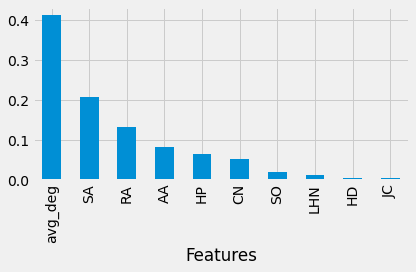

In [47]:
columns = ['CN', 'AA', 'HP', 'HD', 'JC', 'LHN', 'RA', 'SA', 'SO', 'avg_deg']
feature_importance(columns, classifier)

# Predictiong Graph in 2016

* Load training and testing dataframes

In [48]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2016/train/dataframe.csv", newline='') as csvfile:
    training_df = pd.read_csv(csvfile)
    
training_df['avg_deg'] = (training_df['deg_e1']+training_df['deg_e2'])/2
training_df = training_df.drop(['deg_e1', 'deg_e2'], axis=1)
training_df = training_df[['e1','e2','CN','AA','HP','HD','JC','LHN','RA','SA','SO','avg_deg','label']]

X_train = training_df.iloc[:,2:-1]
Y_train = training_df.iloc[:]['label']

X_train.head()

with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2016/test/dataframe.csv", newline='') as csvfile:
    testing_df = pd.read_csv(csvfile)

testing_df['avg_deg'] = (testing_df['deg_e1']+testing_df['deg_e2'])/2
testing_df = testing_df.drop(['deg_e1', 'deg_e2'], axis=1)
testing_df = testing_df[['e1','e2','CN','AA','HP','HD','JC','LHN','RA','SA','SO','avg_deg','label']]


X_test = testing_df.iloc[:,2:-1]
Y_test = testing_df.iloc[:]['label']

X_test.head()

,CN,AA,HP,HD,JC,LHN,RA,SA,SO,avg_deg
0,2120.000,233.553,1.000,0.952,0.951,0.000,4.825,4.825,0.975,2174.500
1,2120.000,233.553,1.000,0.952,0.951,0.000,4.825,4.825,0.975,2174.500
2,2102.000,230.939,0.991,0.976,0.967,0.000,4.660,4.660,0.983,2137.500
3,2120.000,233.553,1.000,0.956,0.956,0.000,4.825,4.825,0.977,2169.000
4,2120.000,233.553,1.000,0.952,0.951,0.000,4.825,4.825,0.975,2174.500


In [49]:
X_test.head()

,CN,AA,HP,HD,JC,LHN,RA,SA,SO,avg_deg
0,2120.000,233.553,1.000,0.952,0.951,0.000,4.825,4.825,0.975,2174.500
1,2120.000,233.553,1.000,0.952,0.951,0.000,4.825,4.825,0.975,2174.500
2,2102.000,230.939,0.991,0.976,0.967,0.000,4.660,4.660,0.983,2137.500
3,2120.000,233.553,1.000,0.956,0.956,0.000,4.825,4.825,0.977,2169.000
4,2120.000,233.553,1.000,0.952,0.951,0.000,4.825,4.825,0.975,2174.500


* define evaluation function

In [50]:
def evaluate_model(predictions, actual):
    return pd.DataFrame({
        "Measure": ["Accuracy", "Precision", "Recall", "F1"],
        "Source": [accuracy_score(actual, predictions), 
                   precision_score(actual, predictions), 
                   recall_score(actual, predictions),
                   f1_score(actual, predictions)]
    })

* Find important features

In [51]:
def feature_importance(columns, classifier):
    display("Feature Importance")
    df = pd.DataFrame({"Features": columns,
                      "Importance": classifier.feature_importances_})
    df = df.sort_values("Importance", ascending=False)
    ax = df.plot(kind='bar', x='Features', y='Importance', legend=None)
    #ax.xaxist.set_label_text("")
    plt.tight_layout()
    plt.show

* choose a ML algorithm

In [52]:
classifier = RandomForestClassifier(n_estimators=30, max_depth=10, random_state=0)

* Training

In [53]:
classifier.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, n_estimators=30, random_state=0)

* Make a predict

In [54]:
prediction = classifier.predict(X_test)

In [55]:
display(evaluate_model(prediction, Y_test))

,Measure,Source
0,Accuracy,0.861
1,Precision,0.878
2,Recall,0.713
3,F1,0.787


'Feature Importance'

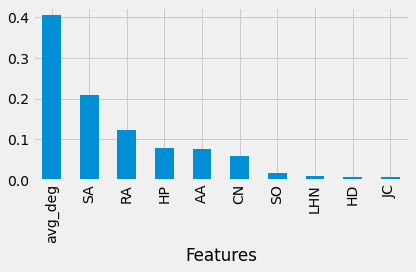

In [56]:
columns = ['CN', 'AA', 'HP', 'HD', 'JC', 'LHN', 'RA', 'SA', 'SO', 'avg_deg']
feature_importance(columns, classifier)

# Predictiong Graph in 2017

* Load training and testing dataframes

In [57]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2017/train/dataframe.csv", newline='') as csvfile:
    training_df = pd.read_csv(csvfile)
    
training_df['avg_deg'] = (training_df['deg_e1']+training_df['deg_e2'])/2
training_df = training_df.drop(['deg_e1', 'deg_e2'], axis=1)
training_df = training_df[['e1','e2','CN','AA','HP','HD','JC','LHN','RA','SA','SO','avg_deg','label']]

X_train = training_df.iloc[:,2:-1]
Y_train = training_df.iloc[:]['label']

X_train.head()

with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2017/test/dataframe.csv", newline='') as csvfile:
    testing_df = pd.read_csv(csvfile)

testing_df['avg_deg'] = (testing_df['deg_e1']+testing_df['deg_e2'])/2
testing_df = testing_df.drop(['deg_e1', 'deg_e2'], axis=1)
testing_df = testing_df[['e1','e2','CN','AA','HP','HD','JC','LHN','RA','SA','SO','avg_deg','label']]


X_test = testing_df.iloc[:,2:-1]
Y_test = testing_df.iloc[:]['label']

X_test.head()

,CN,AA,HP,HD,JC,LHN,RA,SA,SO,avg_deg
0,2542.000,271.545,1.000,0.967,0.967,0.000,4.859,4.859,0.983,2586.000
1,2542.000,271.545,1.000,0.967,0.967,0.000,4.859,4.859,0.983,2586.000
2,2502.000,266.095,0.984,0.983,0.968,0.000,4.582,4.582,0.983,2544.000
3,2542.000,271.545,1.000,0.969,0.969,0.000,4.859,4.859,0.984,2582.500
4,2542.000,271.545,1.000,0.967,0.967,0.000,4.859,4.859,0.983,2586.000


In [58]:
X_test.head()

,CN,AA,HP,HD,JC,LHN,RA,SA,SO,avg_deg
0,2542.000,271.545,1.000,0.967,0.967,0.000,4.859,4.859,0.983,2586.000
1,2542.000,271.545,1.000,0.967,0.967,0.000,4.859,4.859,0.983,2586.000
2,2502.000,266.095,0.984,0.983,0.968,0.000,4.582,4.582,0.983,2544.000
3,2542.000,271.545,1.000,0.969,0.969,0.000,4.859,4.859,0.984,2582.500
4,2542.000,271.545,1.000,0.967,0.967,0.000,4.859,4.859,0.983,2586.000


* define evaluation function

In [59]:
def evaluate_model(predictions, actual):
    return pd.DataFrame({
        "Measure": ["Accuracy", "Precision", "Recall", "F1"],
        "Source": [accuracy_score(actual, predictions), 
                   precision_score(actual, predictions), 
                   recall_score(actual, predictions),
                   f1_score(actual,predictions)]
    })

* Find important features

In [60]:
def feature_importance(columns, classifier):
    display("Feature Importance")
    df = pd.DataFrame({"Features": columns,
                      "Importance": classifier.feature_importances_})
    df = df.sort_values("Importance", ascending=False)
    ax = df.plot(kind='bar', x='Features', y='Importance', legend=None)
    #ax.xaxist.set_label_text("")
    plt.tight_layout()
    plt.show

* choose a ML algorithm

In [61]:
classifier = RandomForestClassifier(n_estimators=30, max_depth=10, random_state=0)

* Training

In [62]:
classifier.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, n_estimators=30, random_state=0)

* Make a predict

In [63]:
prediction = classifier.predict(X_test)

In [64]:
display(evaluate_model(prediction, Y_test))

,Measure,Source
0,Accuracy,0.882
1,Precision,0.842
2,Recall,0.814
3,F1,0.828


'Feature Importance'

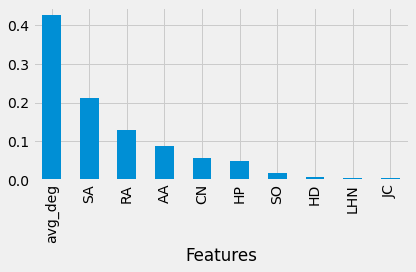

In [65]:
columns = ['CN', 'AA', 'HP', 'HD', 'JC', 'LHN', 'RA', 'SA', 'SO', 'avg_deg']
feature_importance(columns, classifier)


# Predictiong Graph in 2018

* Load training and testing dataframes

In [66]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2018/train/dataframe.csv", newline='') as csvfile:
    training_df = pd.read_csv(csvfile)
    
training_df['avg_deg'] = (training_df['deg_e1']+training_df['deg_e2'])/2
training_df = training_df.drop(['deg_e1', 'deg_e2'], axis=1)
training_df = training_df[['e1','e2','CN','AA','HP','HD','JC','LHN','RA','SA','SO','avg_deg','label']]

X_train = training_df.iloc[:,2:-1]
Y_train = training_df.iloc[:]['label']

X_train.head()

with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2018/test/dataframe.csv", newline='') as csvfile:
    testing_df = pd.read_csv(csvfile)

testing_df['avg_deg'] = (testing_df['deg_e1']+testing_df['deg_e2'])/2
testing_df = testing_df.drop(['deg_e1', 'deg_e2'], axis=1)
testing_df = testing_df[['e1','e2','CN','AA','HP','HD','JC','LHN','RA','SA','SO','avg_deg','label']]


X_test = testing_df.iloc[:,2:-1]
Y_test = testing_df.iloc[:]['label']

X_test.head()

,CN,AA,HP,HD,JC,LHN,RA,SA,SO,avg_deg
0,2984.000,311.668,1.000,0.972,0.972,0.000,4.888,4.888,0.986,3027.500
1,2984.000,311.668,1.000,0.972,0.972,0.000,4.888,4.888,0.986,3027.500
2,2944.000,306.227,0.986,0.982,0.968,0.000,4.631,4.631,0.984,2992.000
3,2984.000,311.668,1.000,0.975,0.974,0.000,4.888,4.888,0.987,3023.500
4,2984.000,311.668,1.000,0.972,0.972,0.000,4.888,4.888,0.986,3027.500


In [ ]:
X_test.head()

* define evaluation function

In [67]:
def evaluate_model(predictions, actual):
    return pd.DataFrame({
        "Measure": ["Accuracy", "Precision", "Recall","F1"],
        "Source": [accuracy_score(actual, predictions), 
                   precision_score(actual, predictions), 
                   recall_score(actual, predictions),
                   f1_score(actual, predictions)]
    })

* Find important features

In [68]:
def feature_importance(columns, classifier):
    display("Feature Importance")
    df = pd.DataFrame({"Features": columns,
                      "Importance": classifier.feature_importances_})
    df = df.sort_values("Importance", ascending=False)
    ax = df.plot(kind='bar', x='Features', y='Importance', legend=None)
    #ax.xaxist.set_label_text("")
    plt.tight_layout()
    plt.show

* choose a ML algorithm

In [69]:
classifier = RandomForestClassifier(n_estimators=30, max_depth=10, random_state=0)

* Training

In [70]:
classifier.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, n_estimators=30, random_state=0)

* Make a predict

In [71]:
prediction = classifier.predict(X_test)

In [72]:
display(evaluate_model(prediction, Y_test))

,Measure,Source
0,Accuracy,0.847
1,Precision,0.650
2,Recall,0.879
3,F1,0.748


'Feature Importance'

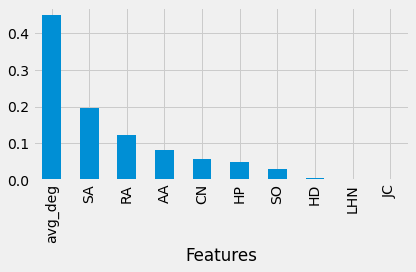

In [73]:
columns = ['CN', 'AA', 'HP', 'HD', 'JC', 'LHN', 'RA', 'SA', 'SO', 'avg_deg']
feature_importance(columns, classifier)


# Predictiong Graph in 2019

* Load training and testing dataframes

In [102]:
with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2019/train/dataframe.csv", newline='') as csvfile:
    training_df = pd.read_csv(csvfile)
    
training_df['avg_deg'] = (training_df['deg_e1']+training_df['deg_e2'])/2
training_df = training_df.drop(['deg_e1', 'deg_e2'], axis=1)
training_df = training_df[['e1','e2','CN','AA','HP','HD','JC','LHN','RA','SA','SO','avg_deg','label']]

X_train = training_df.iloc[:,2:-1]
Y_train = training_df.iloc[:]['label']

X_train.head()

with open("/home/c6/Desktop/OpenWPM/jsons/Prediction_new/non_temporal_unweighted/2019/test/dataframe.csv", newline='') as csvfile:
    testing_df = pd.read_csv(csvfile)

testing_df['avg_deg'] = (testing_df['deg_e1']+testing_df['deg_e2'])/2
testing_df = testing_df.drop(['deg_e1', 'deg_e2'], axis=1)
testing_df = testing_df[['e1','e2','CN','AA','HP','HD','JC','LHN','RA','SA','SO','avg_deg','label']]


X_test = testing_df.iloc[:,2:-1]
Y_test = testing_df.iloc[:]['label']

X_test.head()

,CN,AA,HP,HD,JC,LHN,RA,SA,SO,avg_deg
0,3161.000,326.537,1.000,0.979,0.979,0.000,4.853,4.853,0.989,3195.000
1,3161.000,326.537,1.000,0.979,0.979,0.000,4.853,4.853,0.989,3195.000
2,3110.000,319.648,0.986,0.984,0.970,0.000,4.539,4.539,0.985,3157.500
3,3161.000,326.537,1.000,0.981,0.981,0.000,4.853,4.853,0.990,3191.500
4,3161.000,326.537,1.000,0.979,0.979,0.000,4.853,4.853,0.989,3195.000


In [93]:
positive_samples = 0
negative_sample = 0
for i in Y_train:
    if i==1:
        positive_samples += 1 
    else:
        negative_sample += 1

print("Positive Samples: ", positive_samples)
print("Negative_samples: ", negative_sample)

Positive Samples:  1274113
Negative_samples:  4319946


### upsample minority class

In [103]:
# Separate majority and minority classes
df_majority = training_df[training_df.label==0]
df_minority = training_df[training_df.label==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=8639892,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.label.value_counts()
X_train = df_upsampled.iloc[:,2:-1]
Y_train = df_upsampled.iloc[:]['label']
# 1    576
# 0    576
# Name: balance, dtype: int64

* define evaluation function

In [104]:
def evaluate_model(predictions, actual):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(predictions)): 
        if actual[i]==predictions[i]==1:
            TP += 1
        if predictions[i]==1 and actual[i]!=predictions[i]:
            FP += 1
        if actual[i]==predictions[i]==0:
            TN += 1
        if predictions[i]==0 and actual[i]!=predictions[i]:
            FN += 1
    return pd.DataFrame({
        "Measure": ["Accuracy", "Precision", "Recall", "FPR", "FNR", "F1"],
        "Source": [accuracy_score(actual, predictions), 
                   precision_score(actual, predictions), 
                   recall_score(actual, predictions),
                   FP/(FP+TN),
                   FN/(FN+TP),
                   f1_score(actual, predictions)]
    })

* Find important features

In [105]:
def feature_importance(columns, classifier):
    display("Feature Importance")
    df = pd.DataFrame({"Features": columns,
                      "Importance": classifier.feature_importances_})
    df = df.sort_values("Importance", ascending=False)
    ax = df.plot(kind='bar', x='Features', y='Importance', legend=None)
    #ax.xaxist.set_label_text("")
    plt.tight_layout()
    plt.show

 ### choose a ML algorithm 

### 1. Random Forest

In [106]:
classifier = RandomForestClassifier(n_estimators=100, max_depth=10, criterion="entropy")

### 2. SVM

In [ ]:
classifier = SVC(kernel='linear', class_weight='balanced', probability=True)

### 3. MLP

In [ ]:
classifier = MLPClassifier(random_state=1, max_iter=300, activation='tanh', learning_rate='adaptive')

### 4. Naive Bayes

In [ ]:
#classifier = GaussianNB()
classifier = ComplementNB()
#classifier = MultinomialNB()
#classifier = BernoulliNB()

### Train and predict

In [ ]:
classifier.fit(X_train, Y_train)

In [ ]:
prediction = classifier.predict(X_test)

In [ ]:
np.unique(prediction)

In [ ]:
display(evaluate_model(prediction, Y_test))

'Feature Importance'

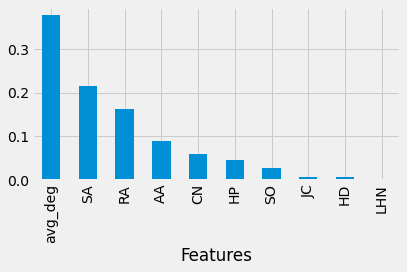

In [83]:
columns = ['CN', 'AA', 'HP', 'HD', 'JC', 'LHN', 'RA', 'SA', 'SO', 'avg_deg']
feature_importance(columns, classifier)